Продолжаем работу с решающими деревьями. Попробуем довести задачу обучения дерева до конца.

In [2]:
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Данные

In [3]:
titanic_data = pd.read_csv('data/titanic/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [5]:
y = titanic_data.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


Создадим опять дерево и обучим его

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\graphviz2.38\\bin" + os.pathsep + "C:\\Program Files (x86)\\graphviz2.38"
from IPython.display import SVG
from IPython.display import display
from IPython.display import HTML
from graphviz import Source

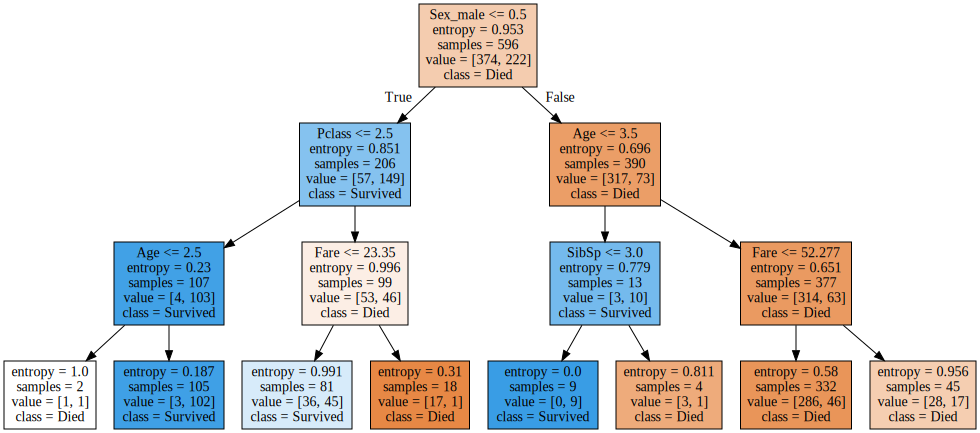

In [11]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), \
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

Применим другие параметры:
* min_sample_split - минимально допустимый размер выборки, по котором можно спуститься вниз;

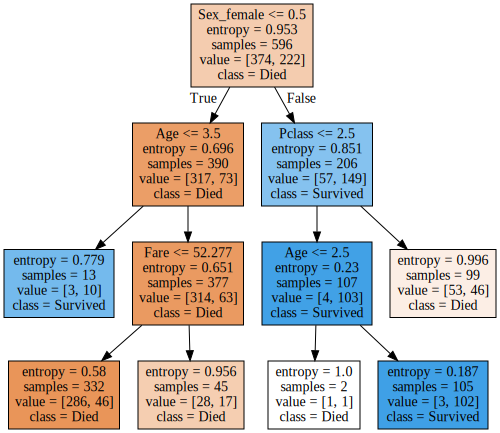

In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100)
clf.fit(X_train, y_train)
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), \
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

* min_sample_leaf - минимальный размер выборки для листа

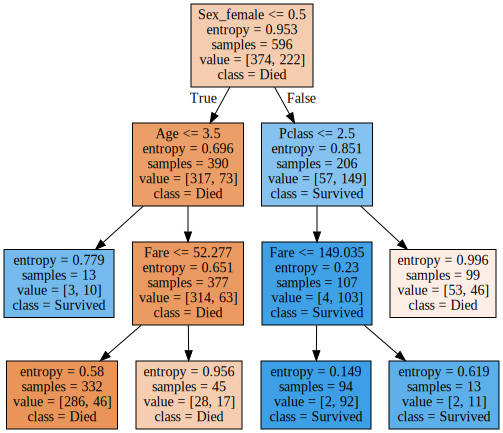

In [13]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=100, min_samples_leaf=10)
clf.fit(X_train, y_train)
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), \
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

# Random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
clf_rf = RandomForestClassifier()

In [16]:
parameters = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7, 10]}

In [18]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [19]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [20]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 10}

In [21]:
best_clf = grid_search_cv_clf.best_estimator_

In [22]:
best_clf.score(X_test, y_test)

0.7898305084745763

In [24]:
feature_importance = best_clf.feature_importances_

In [26]:
feature_importance_df = pd.DataFrame({'feature': list(X_train),
                                       'feature_importance': feature_importance})
feature_importance_df

,feature,feature_importance
0,Pclass,0.126844
1,Age,0.163275
2,SibSp,0.032325
3,Parch,0.046593
4,Fare,0.179137
5,Sex_female,0.233065
6,Sex_male,0.180481
7,Embarked_C,0.020017
8,Embarked_Q,0.010511
9,Embarked_S,0.007753


In [27]:
feature_importance_df.sort_values('feature_importance', ascending=False)


,feature,feature_importance
5,Sex_female,0.233065
6,Sex_male,0.180481
4,Fare,0.179137
1,Age,0.163275
0,Pclass,0.126844
3,Parch,0.046593
2,SibSp,0.032325
7,Embarked_C,0.020017
8,Embarked_Q,0.010511
9,Embarked_S,0.007753


## ЗАДАЧА

Воспользуемся данными о сердечных заболеваниях и обучим на них Random Forest. 
Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

In [28]:
heart_data = pd.read_csv('data/heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
heart_X = heart_data.drop('target', axis=1)
heart_X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [32]:
heart_y = heart_data.target
heart_y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [36]:
np.random.seed(0)
clf_heart = RandomForestClassifier(10, max_depth=5)
clf_heart.fit(heart_X, heart_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

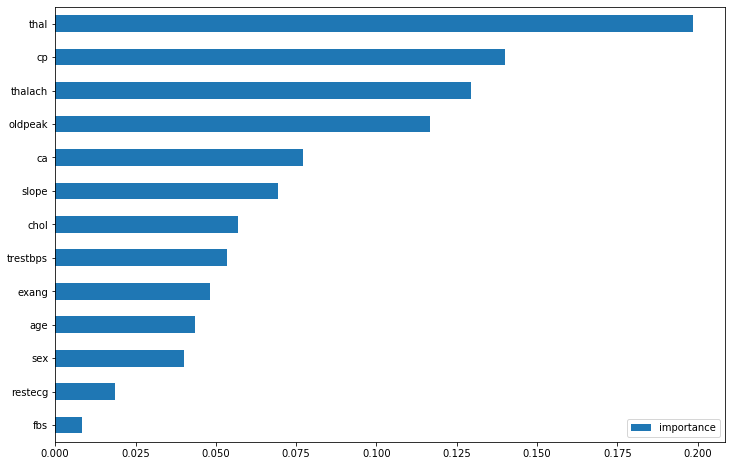

In [37]:
imp = pd.DataFrame(clf_heart.feature_importances_, index=heart_X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
